In [1]:
import pandas as pd
import numpy as np

/Users/michaelli/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_15 = pd.read_csv('Medicare_Referring_Provider_DMEPOS_PUF_CY2015.txt', sep = '\t')
df_14 = pd.read_csv('Medicare_Referring_Provider_DMEPOS_PUF_CY2014.txt', sep = '\t')
df_13 = pd.read_csv('Medicare_Referring_Provider_DMEPOS_PUF_CY2013.txt', sep = '\t')
df_15['YEAR'] = '2015'
df_14['YEAR'] = '2014'
df_13['YEAR'] = '2013'
df = df_15.append([df_14, df_13])
df.head()

/Users/michaelli/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AVG_SUPPLIER_MEDICARE_ALLOW_AMT,AVG_SUPPLIER_MEDICARE_PMT_AMT,AVG_SUPPLIER_MEDICARE_STD_AMT,AVG_SUPPLIER_SUBMITTED_CHARGE,BETOS_CLASSIFICATION,BETOS_CLASSIFICATION_GROUP,HCPCS_CODE,HCPCS_DESCRIPTION,NUMBER_OF_SUPPLIERS,NUMBER_OF_SUPPLIER_BENEFICIARIES,...,REFERRING_PROVIDER_LAST_ORG_NAME,REFERRING_PROVIDER_MI,REFERRING_PROVIDER_STATE,REFERRING_PROVIDER_STREET1,REFERRING_PROVIDER_STREET2,REFERRING_PROVIDER_TYPE,REFERRING_PROVIDER_TYPE_FLAG,REFERRING_PROVIDER_ZIP,SUPPLIER_RENTAL_INDICATOR,YEAR
0,30.324808,23.313077,23.313077,48.854615,D1C - Oxygen and Supplies,Durable Medical Equipment,E0431,"Portable gaseous oxygen system, rental; includ...",6,NaN,...,ENKESHAFI,NaN,MD,900 SETON DR,NaN,Internal Medicine,S,215021854,Y,2015
1,180.920000,137.009767,137.009767,251.009186,D1C - Oxygen and Supplies,Durable Medical Equipment,E1390,"Oxygen concentrator, single delivery port, cap...",6,15.0,...,ENKESHAFI,NaN,MD,900 SETON DR,NaN,Internal Medicine,S,215021854,Y,2015
2,30.420000,23.847143,23.847143,90.714286,D1C - Oxygen and Supplies,Durable Medical Equipment,E0431,"Portable gaseous oxygen system, rental; includ...",2,NaN,...,GIRARDI,J,PA,100 HOSPITAL RD,NaN,Family Practice,S,158251367,Y,2015
3,15.098600,11.209400,11.210000,40.500000,D1E - Other DME,Durable Medical Equipment,E0570,"Nebulizer, with compressor",4,NaN,...,GIRARDI,J,PA,100 HOSPITAL RD,NaN,Family Practice,S,158251367,Y,2015
4,180.920000,141.842857,141.842857,418.942857,D1C - Oxygen and Supplies,Durable Medical Equipment,E1390,"Oxygen concentrator, single delivery port, cap...",2,NaN,...,GIRARDI,J,PA,100 HOSPITAL RD,NaN,Family Practice,S,158251367,Y,2015


In [3]:
df.shape

(5482519, 29)

In [4]:
df.columns.values

array(['AVG_SUPPLIER_MEDICARE_ALLOW_AMT', 'AVG_SUPPLIER_MEDICARE_PMT_AMT',
       'AVG_SUPPLIER_MEDICARE_STD_AMT', 'AVG_SUPPLIER_SUBMITTED_CHARGE',
       'BETOS_CLASSIFICATION', 'BETOS_CLASSIFICATION_GROUP', 'HCPCS_CODE',
       'HCPCS_DESCRIPTION', 'NUMBER_OF_SUPPLIERS',
       'NUMBER_OF_SUPPLIER_BENEFICIARIES', 'NUMBER_OF_SUPPLIER_CLAIMS',
       'NUMBER_OF_SUPPLIER_SERVICES', 'REFERRING_CREDENTIALS',
       'REFERRING_ENTITY_CODE', 'REFERRING_NPI', 'REFERRING_PROVIDER_CITY',
       'REFERRING_PROVIDER_COUNTRY', 'REFERRING_PROVIDER_FIRST_NAME',
       'REFERRING_PROVIDER_GENDER', 'REFERRING_PROVIDER_LAST_ORG_NAME',
       'REFERRING_PROVIDER_MI', 'REFERRING_PROVIDER_STATE',
       'REFERRING_PROVIDER_STREET1', 'REFERRING_PROVIDER_STREET2',
       'REFERRING_PROVIDER_TYPE', 'REFERRING_PROVIDER_TYPE_FLAG',
       'REFERRING_PROVIDER_ZIP', 'SUPPLIER_RENTAL_INDICATOR', 'YEAR'], dtype=object)

In [9]:
df_hcpcs_lv2 = df[['HCPCS_CODE', 'HCPCS_DESCRIPTION', 'YEAR', 'NUMBER_OF_SUPPLIER_BENEFICIARIES', 'NUMBER_OF_SUPPLIER_CLAIMS']].groupby(['HCPCS_CODE','HCPCS_DESCRIPTION', 'YEAR'])['NUMBER_OF_SUPPLIER_BENEFICIARIES', 'NUMBER_OF_SUPPLIER_CLAIMS'].apply(np.sum)

In [10]:
df_hcpcs_lv2.head()

NUMBER_OF_SUPPLIER_BENEFICIARIES  \
HCPCS_CODE HCPCS_DESCRIPTION                                  YEAR                                     
A4216      Sterile water, saline and/or dextrose, diluent/... 2013                             248.0   
                                                              2014                             298.0   
                                                              2015                             447.0   
A4217      Sterile water/saline, 500 ml                       2013                             226.0   
                                                              2014                             247.0   

                                                                    NUMBER_OF_SUPPLIER_CLAIMS  
HCPCS_CODE HCPCS_DESCRIPTION                                  YEAR                             
A4216      Sterile water, saline and/or dextrose, diluent/... 2013                     3404.0  
                                                              2014                     3627.0  
                                                              2015                     4364.0  
A4217      Sterile water/saline, 500 ml                       2013                     6408.0  
                                                              2014                     6843.0

In [11]:
df_hcpcs_lv2.shape

(3141, 2)

In [13]:
df_hcpcs_lv2.to_csv('cms_data_groupedby_hcpcs_lv2_2013_to_2015.csv', sep =',', index = True)

In [23]:
df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2013']['NUMBER_OF_SUPPLIER_BENEFICIARIES']

HCPCS_CODE  HCPCS_DESCRIPTION                                                                                                                                                  YEAR
A4216       Sterile water, saline and/or dextrose, diluent/flush, 10 ml                                                                                                        2013        248.0
A4217       Sterile water/saline, 500 ml                                                                                                                                       2013        226.0
A4221       Supplies for maintenance of drug infusion catheter, per week (list drug separately)                                                                                2013      31869.0
A4222       Infusion supplies for external drug infusion pump, per cassette or bag (list drugs separately)                                                                     2013      15168.0
A4233       Replacement battery, alkaline (other

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

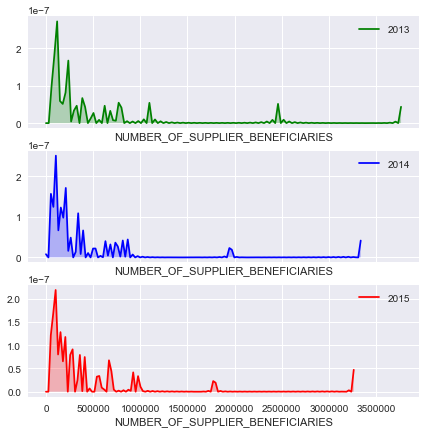

In [30]:
plt.clf()
# Set up the matplotlib figure
sns.despine(left=True)

f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

col1_2013 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2013']['NUMBER_OF_SUPPLIER_BENEFICIARIES']
col1_2014 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2014']['NUMBER_OF_SUPPLIER_BENEFICIARIES']
col1_2015 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2015']['NUMBER_OF_SUPPLIER_BENEFICIARIES']

sns.distplot(col1_2013, hist=False, color="g", kde_kws={"shade": True, 'label' : '2013'}, ax = axes[0])

sns.distplot(col1_2014, hist=False, color="b", kde_kws={"shade": True, 'label' : '2014'}, ax = axes[1])

sns.distplot(col1_2015, hist=False, color="r", kde_kws={"shade": True, 'label' : '2015'}, ax = axes[2])
plt.show()

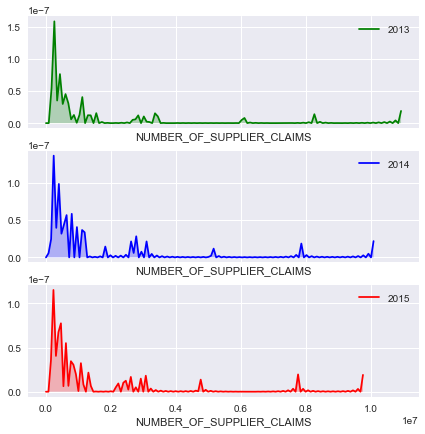

In [31]:
plt.clf()
# Set up the matplotlib figure
sns.despine(left=True)

f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

col2_2013 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2013']['NUMBER_OF_SUPPLIER_CLAIMS']
col2_2014 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2014']['NUMBER_OF_SUPPLIER_CLAIMS']
col2_2015 = df_hcpcs_lv2[df_hcpcs_lv2.index.get_level_values('YEAR') == '2015']['NUMBER_OF_SUPPLIER_CLAIMS']

sns.distplot(col2_2013, hist=False, color="g", kde_kws={"shade": True, 'label' : '2013'}, ax = axes[0])

sns.distplot(col2_2014, hist=False, color="b", kde_kws={"shade": True, 'label' : '2014'}, ax = axes[1])

sns.distplot(col2_2015, hist=False, color="r", kde_kws={"shade": True, 'label' : '2015'}, ax = axes[2])
plt.show()